As an example from T15Gen2, corporate mastered.

This procedure needs admin rights on 2 steps ([install nvidia drivers](/posts/2022-12-15-wsl2-fresh-pc.html#install-nvidia-driver), [activate wsl](/posts/2022-12-15-wsl2-fresh-pc.html#activate-wsl))

# Preparation

## install Windows Terminal

Just install `Windows Terminal` from Windows Store at https://aka.ms/terminal

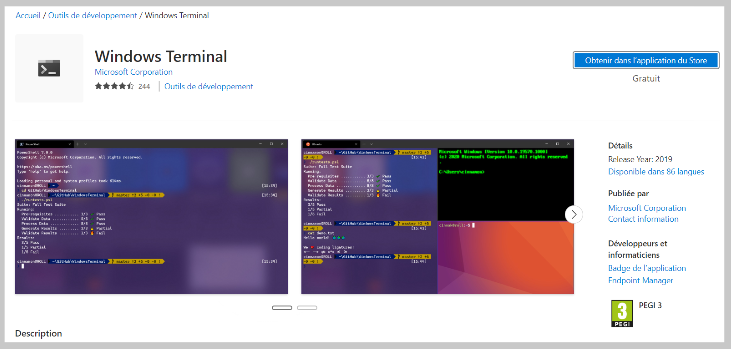

## download Nvidia driver

Download from https://developer.nvidia.com/cuda/wsl

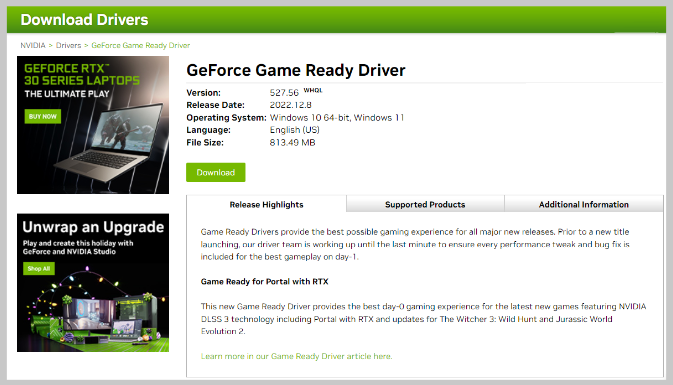

(Dec-22: this file `527.56-desktop-win10-win11-64bit-international-dch-whql.exe`)






## download Ubuntu LTS image

Download from https://cloud-images.ubuntu.com/daily/server/wsl/ 

This address may change (search for « [cloud wsl ubuntu images](https://www.google.com/search?q=cloud+wsl+ubuntu+images&rlz=1C1GCEB_enFR1022FR1022&oq=cloud+wsl+ubuntu+images&aqs=chrome.0.69i59j69i60l3.344j0j7&sourceid=chrome&ie=UTF-8) »)

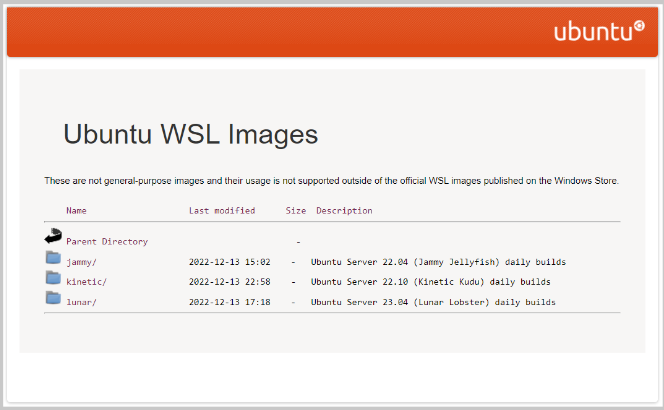

(Dec-22: this file `ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz`)

# Installation

## install Nvidia driver

as admin, install the driver

## install Ubuntu in WSL

### activate WSL

as admin, open windows terminal, and run

```bash
wsl --install
wsl --set-default-version 2
```

### install Ubuntu LTS

following instructions from [install ubuntu 22.04 on WSL # Automatic setup](/posts/2022-04-25-install%20ubuntu%2022.04%20on%20WSL.html#automatic-setup). 

And here are the steps

Create 2 folders: `C:\wsl\Ubuntu-22.04\download`, `C:\wsl\Ubuntu-22.04\instance`

Move `ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz` in `C:\wsl\Ubuntu-22.04\download`

Copy scripts [`setup_wsl_root.sh`](https://raw.githubusercontent.com/castorfou/blog/main/files/setup_wsl_root.sh) and [`setup_wsl_user.sh`](https://raw.githubusercontent.com/castorfou/blog/main/files/setup_wsl_user.sh) to `C:\wsl\Ubuntu-22.04\download`

#### install wsl-vpnkit

Copy [`wsl-vpnkit`](https://github.com/sakai135/wsl-vpnkit/releases/download/v0.3.8/wsl-vpnkit.tar.gz) to `C:\wsl\Ubuntu-22.04\download` (see https://dev.michelin.com/wsl2/fundamentals for more details)

Install wsl-vpnkit from Windows Terminal: 
```
wsl --import wsl-vpnkit $env:USERPROFILE\wsl-vpnkit C:\wsl\ubuntu-22.04\download\wsl-vpnkit.tar.gz
wsl -d wsl-vpnkit
wsl -d wsl-vpnkit service wsl-vpnkit start
```

#### install ubuntu and setup root

Install ubuntu-lts from Windows Terminal: 

```
wsl --import ubuntu-22.04 C:\wsl\ubuntu-22.04\instance C:\wsl\ubuntu-22.04\download\ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz
wsl -d ubuntu-22.04
cd
cp /mnt/c/wsl/Ubuntu-22.04/download/setup_wsl_* ~/
chmod +x setup_wsl_root.sh
./setup_wsl_root.sh
``` 

Provide username, password and quit session with Ctrl-D
    

From Windows Terminal, stop wsl with `wsl -t ubuntu-22.04`, a new profile for ubuntu-22.04 should have been automatically created in Windows Terminal

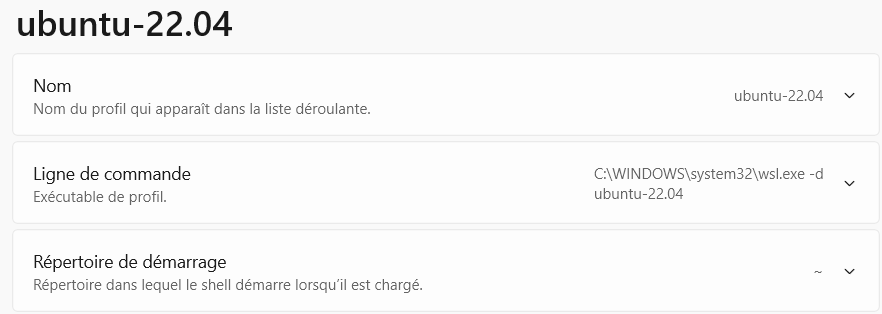

#### setup user

Start `ubuntu-22.04` by clicking the profile in Windows Terminal

Should start with something like

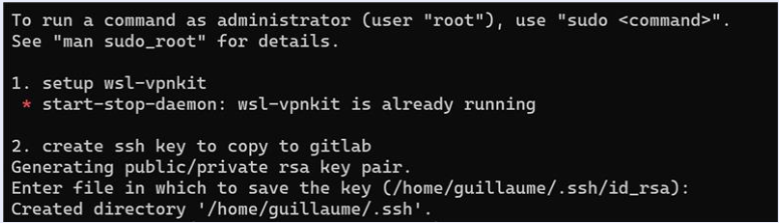

Step 2: accept default entries (type enter). Add the generated key to gitlab > preferences > SSH keys. And then resume.


At that stage this is a fully operating image of ubuntu (internet, apt)

### activate systemd

If running wsl version > 1.0, you can [activate systemd](/posts/2022-12-19-wsl2-from-windows-store.html#systemd)

Modify `/etc/wsl.conf` with

```bash
[boot]
systemd=true
```

And restart wsl image (`wsl -t ubuntu-22.04`)

Test that it works by running

```bash
systemctl list-unit-files --type=service
```

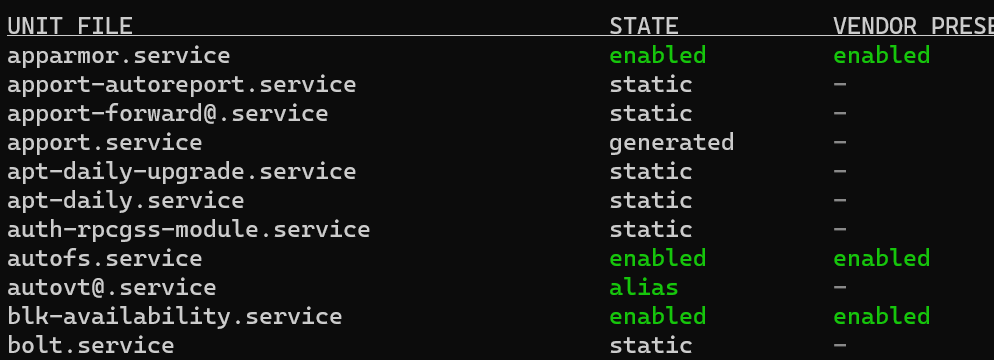

# Configure Ubuntu LTS for Python/AI development

## keep config files in git

I have explained how and why to do this step at [keep dotfiles in git](/posts/2022-04-07-keep%20dotfiles%20in%20git.html)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_00_config_files_in_git.sh | bash
source ~/.bashrc
```

TODO: take branch name as a parameter. Meanwhile download the script and update branch name to something new

## git credential manager to push on github

This is explained at [git-credential-manager repo](https://github.com/GitCredentialManager/git-credential-manager/blob/main/README.md)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_06_git_credential_manager.sh | bash
```

You need to create a personal access token in github.

And when pushing to a github repo, use this token as the password

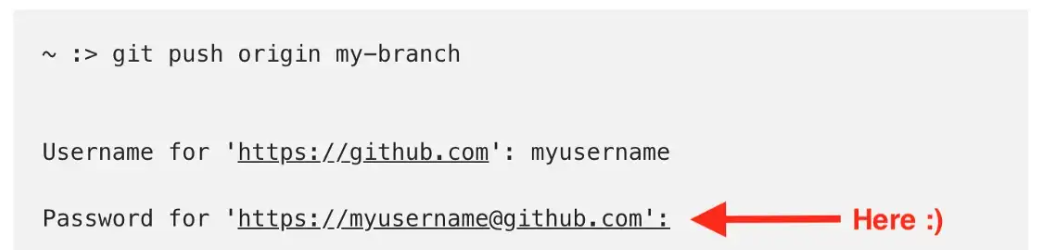

## (optional) automount secured vbox

Because I keep secured data within my secured disks mounted in windows (Z:, Y:, ...)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_01_automount_secured_vbox.sh | bash
```

Modify `/etc/vbox.autofs` to match your actual mounted disks. `sudo service autofs start` to start the service.

if it fails, check that kernel is at least v5. `uname -a`. If not maybe in WSL 1 insted of WSL 2? (`sudo automount -f -v
` should provide more information)

In [5]:
#my vbox.autofs file
!cat /etc/vbox.autofs

janus   -fstype=drvfs,uid=1000,gid=1000 :Z:


## python with conda and configure base environment (jupyterlab, mamba)


Give a look to [script sources](/posts/2022-04-25-install%20ubuntu%2022.04%20on%20WSL.html#python-with-conda-and-configure-base-environment-jupyterlab-mamba)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part1.sh | bash
source ~/.bashrc
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part2.sh | bash
source ~/.bashrc
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part3.sh | bash
source ~/.bashrc
```

## python with pip

Give a look to [script sources](/posts/2022-04-25-install%20ubuntu%2022.04%20on%20WSL.html#configure-pip)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_08_pip.sh | bash
```